In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Initialize notebook mode
init_notebook_mode(connected=True)


In [7]:
df = pd.read_csv("2024_Round_5.csv")
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,9106,14782
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),18286,23024
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,2062,2267
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3638,4265
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,4115,5231


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Institute              11261 non-null  object
 1   Academic Program Name  11261 non-null  object
 2   Quota                  11261 non-null  object
 3   Seat Type              11261 non-null  object
 4   Gender                 11261 non-null  object
 5   Opening Rank           11261 non-null  object
 6   Closing Rank           11261 non-null  object
dtypes: object(7)
memory usage: 616.0+ KB


### As we can see above all the columns in the given data set are objects(strings), we need to change the columns (opening rank, closing rank) to numerical values


### As there are some different objects other than numbers(int) so we removed 'P' from them and converted to float for converting to int


In [9]:
df['Opening Rank'] = df['Opening Rank'].str.replace('P', '', regex=False).astype(float)
df['Closing Rank'] = df['Closing Rank'].str.replace('P', '', regex=False).astype(float)


In [10]:
df[['Opening Rank', 'Closing Rank']] = df[['Opening Rank', 'Closing Rank']].astype(int)


In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
df.describe()

,Opening Rank,Closing Rank
count,11261.00,11261.00
mean,12503.80,15765.37
std,33031.46,47705.36
min,1.00,1.00
25%,1427.00,1685.00
50%,4504.00,5321.00
75%,11915.00,14341.00
max,914560.00,1368129.00


In [13]:
df[['Quota','Seat Type','Gender']] = df[['Quota','Seat Type','Gender']].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Institute              11261 non-null  object  
 1   Academic Program Name  11261 non-null  object  
 2   Quota                  11261 non-null  category
 3   Seat Type              11261 non-null  category
 4   Gender                 11261 non-null  category
 5   Opening Rank           11261 non-null  int32   
 6   Closing Rank           11261 non-null  int32   
dtypes: category(3), int32(2), object(2)
memory usage: 297.8+ KB


In [15]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,9106,14782
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),18286,23024
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,2062,2267
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3638,4265
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,4115,5231


In [16]:
Academic = df['Academic Program Name']
Academic

0        Civil Engineering (4 Years, Bachelor of Techno...
1        Civil Engineering (4 Years, Bachelor of Techno...
2        Civil Engineering (4 Years, Bachelor of Techno...
3        Civil Engineering (4 Years, Bachelor of Techno...
4        Civil Engineering (4 Years, Bachelor of Techno...
                               ...                        
11256    Integrated B. Tech.- M. Tech in Metallurgical ...
11257    Integrated B. Tech.- M. Tech in Metallurgical ...
11258    Integrated B. Tech.- M. Tech in Metallurgical ...
11259    Integrated B. Tech.- M. Tech in Metallurgical ...
11260    Integrated B. Tech.- M. Tech in Metallurgical ...
Name: Academic Program Name, Length: 11261, dtype: object

In [ ]:
def clean_program_name(name):
    # Initialize a list to keep track of features to retain
    features = []
    
    # Check for '4 Years', '5 Years', and 'Dual Degree' in the program name
    if '4 Years' in name:
        features.append('4 Years')
    if '5 Years' in name:
        features.append('5 Years')
    if 'Dual Degree' in name:
        features.append('Dual Degree')

    # Form the cleaned program name
    base_name = name.split(' (')[0]  # Remove everything from the first '(' onwards
    if features:
        return f"{base_name} ({', '.join(features)})"  # Join features with a comma
    else:
        return base_name  # No features, just return the base name
    
    

In [18]:
Academic = Academic.apply(clean_program_name)

In [24]:
Academic


0                              Civil Engineering (4 Years)
1                              Civil Engineering (4 Years)
2                              Civil Engineering (4 Years)
3                              Civil Engineering (4 Years)
4                              Civil Engineering (4 Years)
                               ...                        
11256    Integrated B. Tech.- M. Tech in Metallurgical ...
11257    Integrated B. Tech.- M. Tech in Metallurgical ...
11258    Integrated B. Tech.- M. Tech in Metallurgical ...
11259    Integrated B. Tech.- M. Tech in Metallurgical ...
11260    Integrated B. Tech.- M. Tech in Metallurgical ...
Name: Academic Program Name, Length: 11261, dtype: object

From the above output we have concised the courses offered by all the institutes into simpler form showing only the necessary part of the academic programs.

In [25]:
df['Academic Program Name'] = Academic

In [21]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,9106,14782
1,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Female-only (including Supernumerary),18286,23024
2,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Gender-Neutral,2062,2267
3,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Female-only (including Supernumerary),3638,4265
4,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OBC-NCL,Gender-Neutral,4115,5231


Now If I'm looking as a student perspective I can easily undersatnd what type of courses are there(duration) including ones with dual degree.

In [26]:
gen = df['Gender']

In [27]:
cleaned_genders = [gender.split('(')[0].strip() for gender in gen]

In [28]:
df['Gender'] = cleaned_genders

In [51]:
df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,9106,14782
1,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Female-only,18286,23024
2,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Gender-Neutral,2062,2267
3,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Female-only,3638,4265
4,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OBC-NCL,Gender-Neutral,4115,5231
...,...,...,...,...,...,...,...
11256,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,OPEN,Gender-Neutral,91148,111567
11257,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,EWS,Gender-Neutral,18667,18876
11258,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,OBC-NCL,Gender-Neutral,37570,39002
11259,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,SC,Gender-Neutral,16473,17172


Here we cleaned the Female Gender part from Supernumerary to Female only as it is always there in that particular gender part.

## Data preprocessing done


In [29]:
df['Difference'] = df['Closing Rank'] - df['Opening Rank']

In [53]:
df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
0,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,9106,14782,5676
1,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Female-only,18286,23024,4738
2,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Gender-Neutral,2062,2267,205
3,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Female-only,3638,4265,627
4,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OBC-NCL,Gender-Neutral,4115,5231,1116
...,...,...,...,...,...,...,...,...
11256,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,OPEN,Gender-Neutral,91148,111567,20419
11257,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,EWS,Gender-Neutral,18667,18876,209
11258,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,OBC-NCL,Gender-Neutral,37570,39002,1432
11259,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,SC,Gender-Neutral,16473,17172,699


Observation:-

1) By calculating the difference between the opening and the closing rank we would get to know how competitive a particular course is. eg(IIT Dharwad SC Female Mech.Eng has differnece of 1 only making it standout for that particulaar seat type and gender)

2) Course Reputaation V/s Institute Reputation:

   High rank difference for one course and a small rank difference for another within the same institution might suggest that      certain courses are perceived to offer better career prospects or academic prestige.

3) Seat Availability vs. Competition:

   If the difference between opening and closing ranks is large, it may also suggest that there are more seats available            compared to the number of candidates competing.
   
   A smaller difference might indicate limited seats relative to the number of applicants, with seats filling up quickly at the    top of the rank list.

In [32]:
IIT_df = df[0:3028]

In [33]:
IIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
0,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,9106,14782,5676
1,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Female-only,18286,23024,4738
2,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Gender-Neutral,2062,2267,205
3,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,EWS,Female-only,3638,4265,627
4,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OBC-NCL,Gender-Neutral,4115,5231,1116
...,...,...,...,...,...,...,...,...
3023,Indian Institute of Technology Dharwad,Mechanical Engineering (4 Years),AI,OBC-NCL,Female-only,7628,9014,1386
3024,Indian Institute of Technology Dharwad,Mechanical Engineering (4 Years),AI,SC,Gender-Neutral,1327,2629,1302
3025,Indian Institute of Technology Dharwad,Mechanical Engineering (4 Years),AI,SC,Female-only,4302,4303,1
3026,Indian Institute of Technology Dharwad,Mechanical Engineering (4 Years),AI,ST,Gender-Neutral,664,1213,549


## Branch vs college

In [34]:
gender_neutral_open_IIT_df = IIT_df[(IIT_df['Gender'] == 'Gender-Neutral') & (IIT_df['Seat Type'] == 'OPEN')]
gender_neutral_open_IIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
0,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,9106,14782,5676
10,Indian Institute of Technology Bhubaneswar,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,2389,3685,1296
23,Indian Institute of Technology Bhubaneswar,Electrical Engineering (4 Years),AI,OPEN,Gender-Neutral,5381,7661,2280
34,Indian Institute of Technology Bhubaneswar,Electronics and Communication Engineering (4 Y...,AI,OPEN,Gender-Neutral,3944,5157,1213
45,Indian Institute of Technology Bhubaneswar,Engineering Physics (4 Years),AI,OPEN,Gender-Neutral,10756,11307,551
...,...,...,...,...,...,...,...,...
2981,Indian Institute of Technology Dharwad,Electronics and Communication Engineering (4 Y...,AI,OPEN,Gender-Neutral,4752,8772,4020
2992,Indian Institute of Technology Dharwad,Engineering Physics (4 Years),AI,OPEN,Gender-Neutral,10655,12851,2196
3000,Indian Institute of Technology Dharwad,"Interdisciplinary Sciences (5 Years, Dual Degree)",AI,OPEN,Gender-Neutral,9258,16968,7710
3009,Indian Institute of Technology Dharwad,Mathematics and Computing (4 Years),AI,OPEN,Gender-Neutral,4677,7381,2704


As a student the most concerning matter at this time is to whether go for a good college or prefer a good branch.
So here we generalized every branch of each college with a specific seat type and gender so according to thier ranks they can see the range of variation in the branches of different colleges.|

In [35]:
difference_IIT_df = gender_neutral_open_IIT_df.sort_values(by = 'Difference',ascending = False)

In [146]:
difference_open_IIT_df = difference_IIT_df.drop_duplicates(subset= 'Institute')
difference_open_IIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
1851,Indian Institute of Technology Roorkee,Architecture (5 Years),AI,OPEN,Gender-Neutral,3105,19885,16780
3000,Indian Institute of Technology Dharwad,"Interdisciplinary Sciences (5 Years, Dual Degree)",AI,OPEN,Gender-Neutral,9258,16968,7710
919,Indian Institute of Technology Kharagpur,Physics (4 Years),AI,OPEN,Gender-Neutral,2957,9672,6715
2176,Indian Institute of Technology (ISM) Dhanbad,Mining Engineering (4 Years),AI,OPEN,Gender-Neutral,8439,14762,6323
0,Indian Institute of Technology Bhubaneswar,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,9106,14782,5676
2890,Indian Institute of Technology Jammu,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,11454,15583,4129
2832,Indian Institute of Technology Tirupati,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,11383,15429,4046
2438,Indian Institute of Technology (BHU) Varanasi,"Materials Science and Technology (5 Years, Dua...",AI,OPEN,Gender-Neutral,8540,12524,3984
1176,Indian Institute of Technology Jodhpur,Physics with Specialization (4 Years),AI,OPEN,Gender-Neutral,10714,14641,3927
1842,Indian Institute of Technology Patna,Metallurgical and Materials Engineering (4 Years),AI,OPEN,Gender-Neutral,11553,15323,3770


Observations:-
    
    1) Grouped by descending order of diiferences of unique colleges so that we can get insight that which branch is least           preferred by students in each college.(larger the difference in opening and closing ranks).
    
    2)Students can gain insight if they want to prefer a top college but they have low ranks whuch brancges they can choose or a     good branch in low college.(eg:- Textile Eng. in IIT Delhi or CSE in IIT Bhilai).

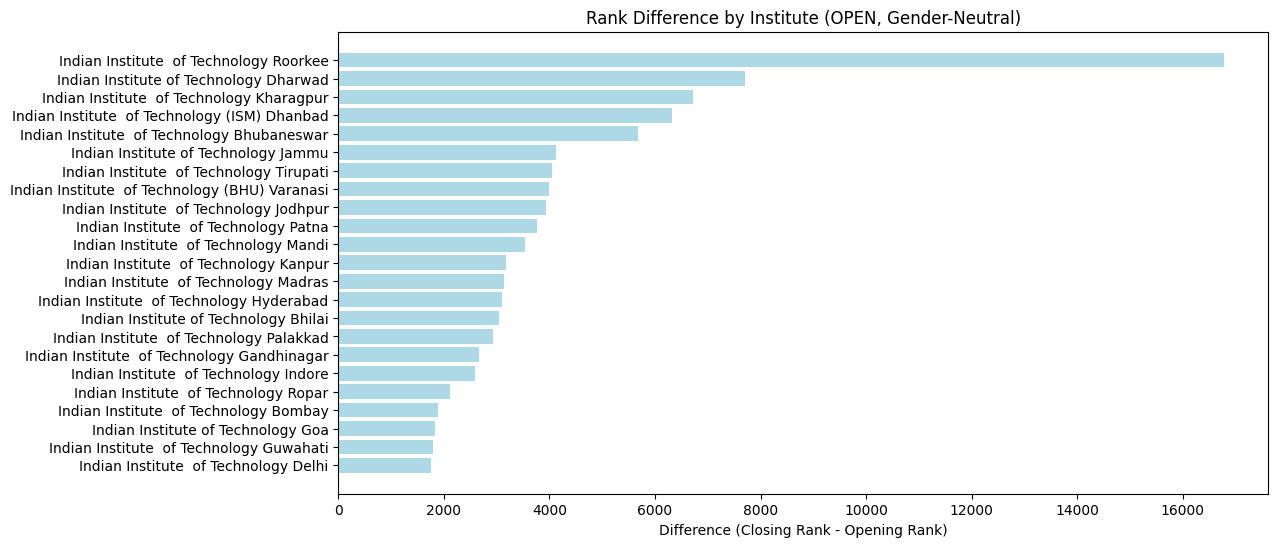

In [149]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.barh(difference_open_IIT_df['Institute'], difference_open_IIT_df['Difference'], color='lightblue')

# Adding labels and title
plt.xlabel('Difference (Closing Rank - Opening Rank)')
plt.title('Rank Difference by Institute (OPEN, Gender-Neutral)')

# Show plot
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

Insights from the graph:-
    
    1) IIT Delhi has the least difference in ranks of the courses offered by them making it more competitive.
    
    2) As seen above the Architecture of IIT Roorkee has a differnce making it least competitive branch or we can say that the number of seats are more in that branch.
    

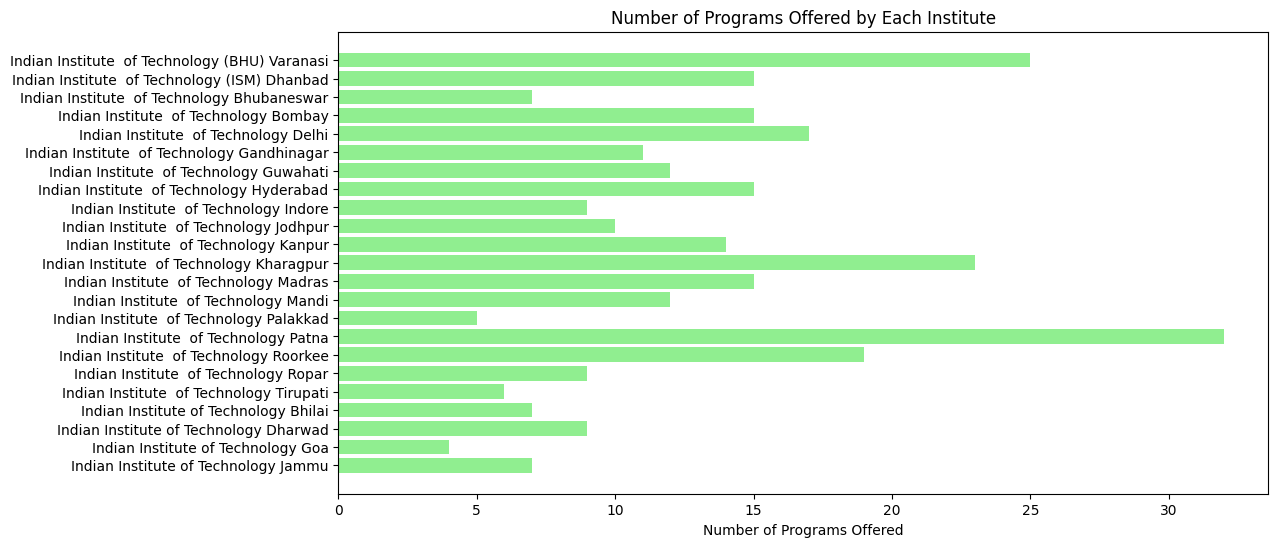

In [141]:
program_counts = gender_neutral_open_IIT_df.groupby('Institute').size().reset_index(name='Program Count')

plt.figure(figsize=(12, 6))
plt.barh(program_counts['Institute'], program_counts['Program Count'], color='lightgreen')
plt.xlabel('Number of Programs Offered')
plt.title('Number of Programs Offered by Each Institute')
plt.gca().invert_yaxis() 
plt.show()

Observations:-
    
    1) Number of academic programs offered by IIT Patna are maximum and IIT Goa is the least.
    
    2) Specialization vs. Generalization:-
        
    Institutes offering many courses may lean towards generalization, where students can explore various subjects before       specializing.
    Institutes with fewer courses may focus on specialization, offering in-depth knowledge in a specific field or discipline.

    3) Institution Size and Academic Breadth
    Institutes offering a large number of courses are likely to be larger institutions with a broad academic curriculum, spanning multiple disciplines (e.g., science, engineering, humanities, social sciences, etc.).

    Institutes offering fewer courses may focus on specialized areas, possibly indicating a niche or targeted academic focus (e.g., specialized research institutes or professional schools).

In [36]:
gender_neutral_open_IIT_df_sorted = gender_neutral_open_IIT_df.sort_values(by='Closing Rank',ascending=False)

In [37]:
closing_neutral_open_gender_IIT_df = gender_neutral_open_IIT_df_sorted.drop_duplicates(subset='Institute')


In [131]:
closing_neutral_open_gender_IIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
2295,Indian Institute of Technology (BHU) Varanasi,Architecture (5 Years),AI,OPEN,Gender-Neutral,20507,22390,1883
706,Indian Institute of Technology Kharagpur,Architecture (5 Years),AI,OPEN,Gender-Neutral,16634,20427,3793
1851,Indian Institute of Technology Roorkee,Architecture (5 Years),AI,OPEN,Gender-Neutral,3105,19885,16780
3000,Indian Institute of Technology Dharwad,"Interdisciplinary Sciences (5 Years, Dual Degree)",AI,OPEN,Gender-Neutral,9258,16968,7710
2917,Indian Institute of Technology Jammu,Materials Engineering (4 Years),AI,OPEN,Gender-Neutral,14903,16439,1536
308,Indian Institute of Technology Mandi,BS in Chemical Sciences (4 Years),AI,OPEN,Gender-Neutral,12900,16430,3530
1115,Indian Institute of Technology Jodhpur,Chemistry with Specialization (4 Years),AI,OPEN,Gender-Neutral,12654,16381,3727
2055,Indian Institute of Technology (ISM) Dhanbad,Applied Geology (5 Years),AI,OPEN,Gender-Neutral,13369,16011,2642
2705,Indian Institute of Technology Bhilai,Materials Science and Metallurgical Engineerin...,AI,OPEN,Gender-Neutral,15066,15871,805
2769,Indian Institute of Technology Palakkad,Civil Engineering (4 Years),AI,OPEN,Gender-Neutral,12874,15812,2938


Sorted the institutes in descending order of their closing ranks.

If a student want to know what colleges he can choose according to his/her rank.

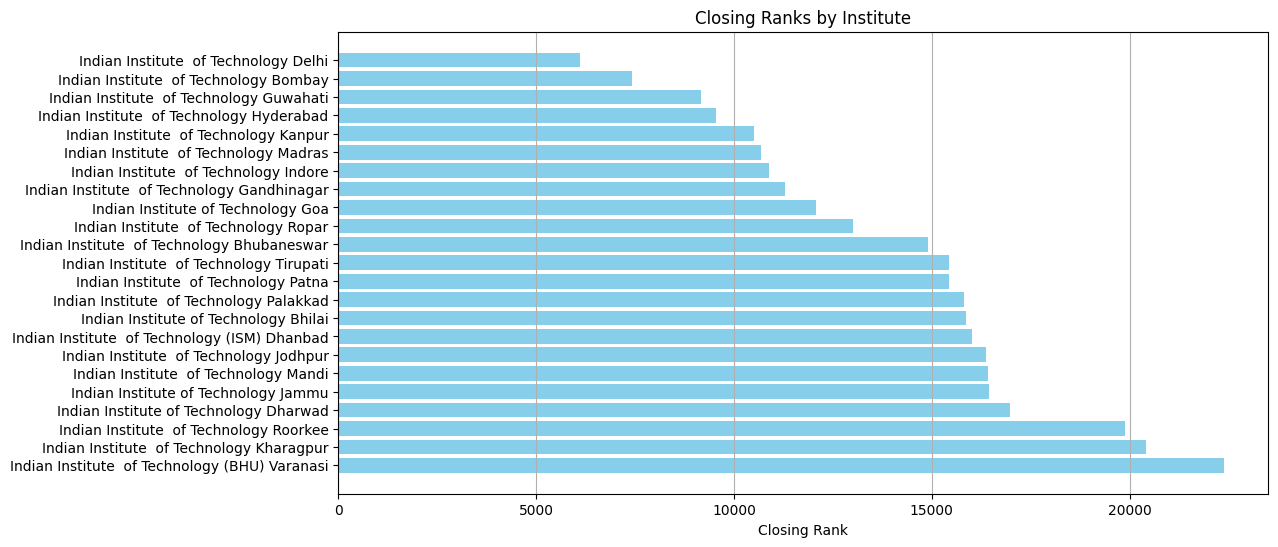

In [132]:
plt.figure(figsize=(12, 6))
plt.barh(closing_neutral_open_gender_IIT_df['Institute'], closing_neutral_open_gender_IIT_df['Closing Rank'], color='skyblue')
plt.title('Closing Ranks by Institute')
plt.xlabel('Closing Rank')
plt.grid(axis='x')
plt.show()

Observations:-
    
    1) Less the closing rank highly preferred college by the students.
    
    2) Higher closing ranks suggest that the college is less competitive, meaning students with lower ranks (further from the top) were able to gain admission.
    
    3)Institution Size and Seat Availability:
        
    Colleges with higher closing ranks may have more seats available, leading to a wider range of students being admitted.   Conversely, lower closing ranks may indicate fewer seats and higher demand.
    
    4)Comparison Between Colleges:
        
    By comparing the closing ranks of different colleges, we can determine how they stack up against each other in terms of student preference and demand.
    
    A college with a lower closing rank may be perceived as offering better opportunities (e.g., placements, quality of education) compared to colleges with higher closing ranks.

    5)Comparison of New vs. Established Colleges:
        
    Newer colleges might have higher closing ranks initially as they establish their reputation. Over time, if their performance improves (e.g., infrastructure, faculty, placements), their closing ranks may decrease.
    
    Established colleges with a strong track record usually maintain lower closing ranks

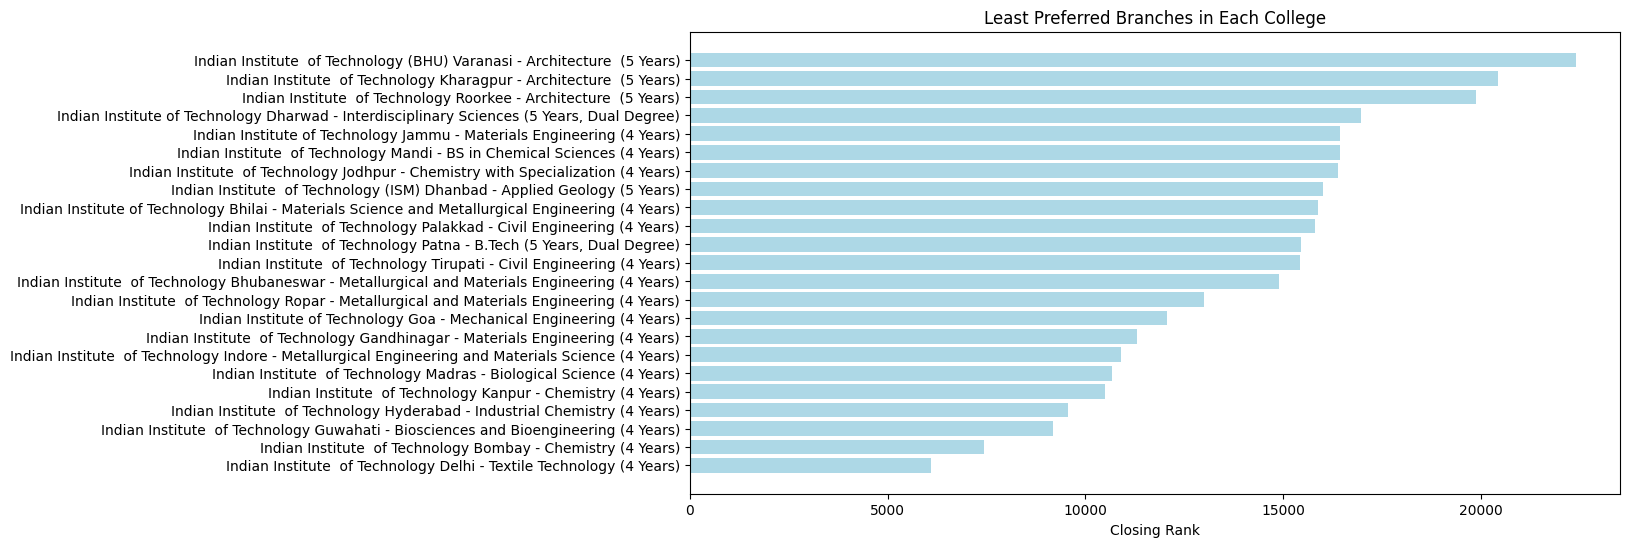

In [137]:
plt.figure(figsize=(12, 6))
plt.barh(closing_neutral_open_gender_IIT_df['Institute']+ ' - ' + closing_neutral_open_gender_IIT_df['Academic Program Name'], 
         closing_neutral_open_gender_IIT_df['Closing Rank'], color='lightblue')
plt.xlabel('Closing Rank')
plt.title('Least Preferred Branches in Each College')
plt.gca().invert_yaxis()  
plt.show()

Observations:-
    
    1)Least preferred branches may reflect the perceived lower value of these disciplines in terms of career prospects, salary expectations, or industry demand.
    
    2)The least preferred branches might reveal a disconnect between student interest and industry needs. In some cases, industries may be in need of professionals from these fields, but students might be unaware of the potential or have misperceptions about them.
    
    3)If traditionally popular branches like electrical engineering or civil engineering are becoming less preferred over time, it may reflect shifts in industry trends toward more technology-oriented or emerging fields like artificial intelligence, data science, or information technology.

    4)This trend can also indicate that students are gravitating toward branches with higher growth potential, job security, or higher salaries in the modern economy.
    
    5)Imbalance Between Seats and Demand:
        
    The least preferred branches often have more available seats than interested students. This observation suggests a potential oversupply of seats in certain branches that are not aligned with student preferences.

In [38]:
gender_neutral_open_branch_IIT_df_sorted_asc = gender_neutral_open_IIT_df.sort_values(by='Closing Rank',ascending=True)
closing_asc_neutral_open_branch_gender_IIT_df = gender_neutral_open_branch_IIT_df_sorted_asc.drop_duplicates(subset='Institute')
closing_asc_neutral_open_branch_gender_IIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
136,Indian Institute of Technology Bombay,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,1,68,67
425,Indian Institute of Technology Delhi,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,27,116,89
1418,Indian Institute of Technology Madras,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,76,159,83
1238,Indian Institute of Technology Kanpur,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,120,252,132
769,Indian Institute of Technology Kharagpur,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,226,415,189
1902,Indian Institute of Technology Roorkee,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,277,481,204
2570,Indian Institute of Technology Guwahati,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,466,623,157
989,Indian Institute of Technology Hyderabad,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,431,656,225
2362,Indian Institute of Technology (BHU) Varanasi,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,667,1071,404
602,Indian Institute of Technology Indore,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,823,1389,566


From the following DataFrame we came to know that the most preferred branch in any college is CSE.

By looking at the closing ranks of CSE in each college we also get to know which institute is best to pursue the folllowing course followed by the subsequent instututes.

Students can also acknowledge which college has a good scope in future as their cutoff is very low.

Newer V/s Older Instututes:
    
    Older and more reputated colleges will have more competiotion than the newly built institutes.


Similar type of analysis and visualisation can be done for IIIT's, NIT's and GFTI's.

## IIIT's

In [39]:
IIIT_df = df[9072:10053]

In [40]:
IIIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
9072,Atal Bihari Vajpayee Indian Institute of Infor...,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,3710,8044,4334
9073,Atal Bihari Vajpayee Indian Institute of Infor...,Computer Science and Engineering (4 Years),AI,OPEN,Female-only,10050,11529,1479
9074,Atal Bihari Vajpayee Indian Institute of Infor...,Computer Science and Engineering (4 Years),AI,OPEN (PwD),Gender-Neutral,212,212,0
9075,Atal Bihari Vajpayee Indian Institute of Infor...,Computer Science and Engineering (4 Years),AI,EWS,Gender-Neutral,1127,1365,238
9076,Atal Bihari Vajpayee Indian Institute of Infor...,Computer Science and Engineering (4 Years),AI,EWS,Female-only,2013,2013,0
...,...,...,...,...,...,...,...,...
10048,"Indian Institute of Information Technology, Va...",Computer Science and Engineering (4 Years),AI,OBC-NCL (PwD),Gender-Neutral,1077,1077,0
10049,"Indian Institute of Information Technology, Va...",Computer Science and Engineering (4 Years),AI,SC,Gender-Neutral,4212,9163,4951
10050,"Indian Institute of Information Technology, Va...",Computer Science and Engineering (4 Years),AI,SC,Female-only,8542,11061,2519
10051,"Indian Institute of Information Technology, Va...",Computer Science and Engineering (4 Years),AI,ST,Gender-Neutral,3469,4629,1160


In [41]:
gender_neutral_open_IIIT_df = IIIT_df[(IIIT_df['Gender'] == 'Gender-Neutral') & (IIIT_df['Seat Type'] == 'OPEN')]
gender_neutral_open_IIIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
9072,Atal Bihari Vajpayee Indian Institute of Infor...,Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,3710,8044,4334
9086,Atal Bihari Vajpayee Indian Institute of Infor...,Electrical and Electronics Engineering (4 Years),AI,OPEN,Gender-Neutral,10447,17195,6748
9097,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and M. Tech (5 Years),AI,OPEN,Gender-Neutral,9708,13577,3869
9110,Atal Bihari Vajpayee Indian Institute of Infor...,Integrated B. Tech.(IT) and MBA (5 Years),AI,OPEN,Gender-Neutral,13833,16856,3023
9123,Atal Bihari Vajpayee Indian Institute of Infor...,Mathematics and Scientific Computing (4 Years),AI,OPEN,Gender-Neutral,8643,11180,2537
...,...,...,...,...,...,...,...,...
9994,"Indian Institute of Information Technology, Ag...",Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,23898,39356,15458
10004,"Indian institute of information technology, Ra...",Artificial Intelligence and Data Science (4 Ye...,AI,OPEN,Gender-Neutral,15185,37788,22603
10016,"Indian institute of information technology, Ra...",Computer Science and Engineering (4 Years),AI,OPEN,Gender-Neutral,21174,34282,13108
10029,"Indian institute of information technology, Ra...",Mathematics and Computing (4 Years),AI,OPEN,Gender-Neutral,25874,39100,13226


In [42]:
NIT_df = df[3028:9072]

In [43]:
NIT_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
3028,Dr. B R Ambedkar National Institute of Technol...,Bio Technology (4 Years),HS,OPEN,Gender-Neutral,56402,67216,10814
3029,Dr. B R Ambedkar National Institute of Technol...,Bio Technology (4 Years),HS,OPEN,Female-only,52325,52325,0
3030,Dr. B R Ambedkar National Institute of Technol...,Bio Technology (4 Years),HS,EWS,Gender-Neutral,13529,14091,562
3031,Dr. B R Ambedkar National Institute of Technol...,Bio Technology (4 Years),HS,EWS,Female-only,13481,13481,0
3032,Dr. B R Ambedkar National Institute of Technol...,Bio Technology (4 Years),HS,OBC-NCL,Gender-Neutral,52003,81089,29086
...,...,...,...,...,...,...,...,...
9067,Indian Institute of Engineering Science and Te...,Mining Engineering (4 Years),OS,EWS,Gender-Neutral,8746,8952,206
9068,Indian Institute of Engineering Science and Te...,Mining Engineering (4 Years),OS,OBC-NCL,Gender-Neutral,17277,17817,540
9069,Indian Institute of Engineering Science and Te...,Mining Engineering (4 Years),OS,OBC-NCL,Female-only,21607,22321,714
9070,Indian Institute of Engineering Science and Te...,Mining Engineering (4 Years),OS,SC,Gender-Neutral,8705,9090,385


In [44]:
GFTI_df = df[10053:]

In [45]:
GFTI_df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Difference
10053,"Assam University, Silchar",Agricultural Engineering (4 Years),AI,OPEN,Gender-Neutral,67259,73418,6159
10054,"Assam University, Silchar",Agricultural Engineering (4 Years),AI,OPEN,Female-only,73632,73632,0
10055,"Assam University, Silchar",Agricultural Engineering (4 Years),AI,EWS,Gender-Neutral,12126,14062,1936
10056,"Assam University, Silchar",Agricultural Engineering (4 Years),AI,OBC-NCL,Gender-Neutral,23145,27706,4561
10057,"Assam University, Silchar",Agricultural Engineering (4 Years),AI,OBC-NCL,Female-only,28093,28093,0
...,...,...,...,...,...,...,...,...
11256,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,OPEN,Gender-Neutral,91148,111567,20419
11257,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,EWS,Gender-Neutral,18667,18876,209
11258,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,OBC-NCL,Gender-Neutral,37570,39002,1432
11259,CU Jharkhand,Integrated B. Tech.- M. Tech in Metallurgical ...,AI,SC,Gender-Neutral,16473,17172,699
